<a href="https://colab.research.google.com/github/UAPH451551/PH451_551_Sp23/blob/main/Solutions/05_neural_nets_with_keras_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands On #5

**Chapter 10 – Introduction to Artificial Neural Networks with Keras**

Due date: 2023-03-06

File name convention: For group 42 and members Richard Stallman and Linus <br> Torvalds it would be: <br>
"05_neural_nets_with_keras_Stallman_Torvalds.pdf"

Submission via blackboard (UA).

Feel free to answer free text questions in text cells using markdown and <br>
possibly $\LaTeX{}$ if you want to.

**You don't have to understand every line of code here and it is not intended <br> 
for you to try to understand every line of code.<br>
Big blocks of code are usually meant to just be clicked through.**

# Setup

In [ ]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
assert tf.__version__ >= "2.0"

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# Perceptrons

**Perceptrons are a form of linear classifier**. The characteristic expression is <br> 
$\Sigma_i w_i \cdot x_i + b$. Where x are your inputs and w are your model
weights<br> 
and b is a learnable bias term. The classification part comes in by setting <br>
**any positive result of the above expression as the 1 or True label** and any <br> **negative result as the 0 or False label**. We then use stochastic gradient <br>
descent to optimize the weights and bias.

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(int)

### Task 1:
Fit the iris dataset into a Perceptron layer and predict the class of a sample <br>
with petal length of 2 and a petal width of 0.5. 

Use: 
`max_iter=1000`, `tol =1e-3` and `random_state= 42`.





**Note**: we set `max_iter` and `tol` explicitly to avoid warnings about the <br>
fact that their default value will change in future versions of Scikit-Learn.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [ ]:
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X,y)

y_pred = per_clf.predict(X)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

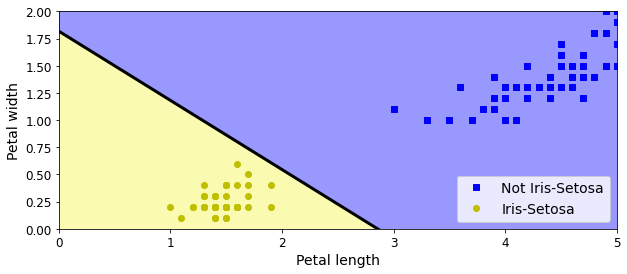

In [ ]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

### Task 2
 Elaborate on the difference between a perceptron and logistic regression.

 **Hint:** Consider the nature of the boundary in the above plot.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your answer goes below

Task 2 answer:

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your answer goes above

# Activation functions

### Task 3
Describe the role of activation functions within a neural network. If you build <br>
a neural network with no activation function, which model that we've seen in <br>
this class would your network resemble?

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your answer goes below

Task 3 answer:

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your answer goes above

# Building an Image Classifier

First let's import TensorFlow and Keras. **Tensorflow is a machine learning** <br>
**platform** developed by Google Brain. **Keras is a python interface for Tensorflow**. <br>
That mean that **we'll typically use model and functions from Keras** but those are <br>
built using building blocks and data structures from Tensorflow.

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.11.0'

In [ ]:
keras.__version__

'2.11.0'

Let's start by loading the [fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset. Keras has a number <br>
of functions to load popular datasets in `keras.datasets`. **The dataset is** <br> **already split for you between a training set and a test set**, but it can be <br> useful to split the training set further to have a validation set:

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [ ]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [ ]:
X_train_full.dtype

dtype('uint8')

Let's **split the full training set into a validation set and a (smaller)** <br> **training set**. We also **scale the pixel intensities down to the 0-1 range** and <br> 
convert them to floats, by dividing by 255. This is essentially min-max scaling <br>
or normalization for pixels with a maximum value of 255 and a minimum of 0.

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'` <br>
color map:

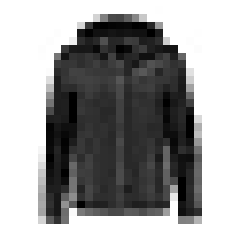

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [ ]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

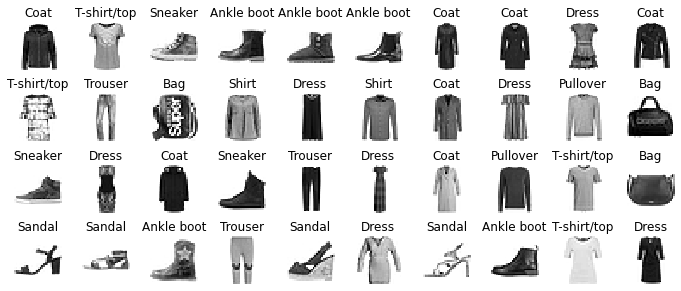

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

**Training a neural network using Keras:** In the cells below we  build an deep <br> 
neural network model using Keras Sequential tool. The input is an image of <br> shape 28 by 28. We use a network with 2 hidden layers with 300 and 100 neurons, <br> 
respectively. The 'softmax' output activation function is used for multi-label <br> 
classification. **This is essentially a multi-layer perceptron model with** <br>
**activation functions added** to each "neuron". Additionally, **we no longer end** <br>
**the model with a decision function** that outputs either a 0 or 1. Here our final <br>
layer's **weights will be passed through a softmax function which will output a** <br>
**collection of 10 values which add up to 1**. These are the probabilities of each <br>
class being the correct class.

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


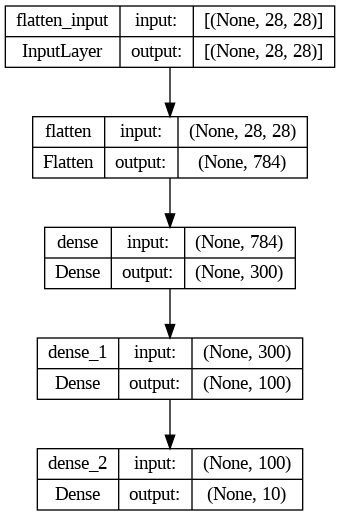

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

We can look at the layers directly:

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
model.get_layer(hidden1.name) is hidden1

True

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights

array([[ 0.04469843, -0.05422964, -0.05177686, ..., -0.07309541,
         0.02381023, -0.03267041],
       [ 0.05055833, -0.04327261, -0.04251326, ..., -0.05290611,
         0.0692049 ,  0.0255134 ],
       [-0.02587988,  0.03207754, -0.05792908, ..., -0.02026293,
         0.00597554,  0.04845247],
       ...,
       [-0.05764323,  0.01063214, -0.02889094, ..., -0.02971672,
         0.00210894,  0.02433814],
       [-0.05783555,  0.00674443, -0.06787005, ...,  0.04922929,
         0.03588595,  0.06603529],
       [-0.07016671,  0.01950844,  0.0213176 , ...,  0.05994374,
        -0.04849339,  0.02029865]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

**Compilation:**  
**Keras allows us to "compile" a complete model which uses the model parameter** <br> 
**structure we defined above**. We compile the model using the  <br>
**"sparse_categorical_crossentropy" loss function** and **"accuracy" as metric** for a <br> 
multi-label classification task. In addition, we choose the **"sgd" optimizer**.<br>
The **SGD optimizer is a derivative of the SGD algorithm** but, instead of updating <br>
coefficients for a linear regression as we saw in previous exercises, we <br> **compute the gradient of our loss function** (sparse categorical crossentropy) <br>
**with respect to our model weights and layer biases** and use that to **update our** <br>
**weights and biases**. Note that our gradient will now be the sum of more <br> complicated partial derivatives. $\partial L/\partial w_i = (\partial L / \partial f(w_i)) (\partial f(w_i) / \partial w_i)$ <br>
where $f(w_i) = ReLU(w_i + b)$.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Now let's train the model for 30 epochs.

We save the most crucial parameters (`['loss', 'accuracy', 'val_loss',` <br> '`val_accuracy']`) in a dictionary named "history". 

In [ ]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 12s 5ms/step - loss: 0.7553 - accuracy: 0.7496 - val_loss: 0.5193 - val_accuracy: 0.8264
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4912 - accuracy: 0.8273 - val_loss: 0.4380 - val_accuracy: 0.8474
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4441 - accuracy: 0.8426 - val_loss: 0.5420 - val_accuracy: 0.7946
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4168 - accuracy: 0.8532 - val_loss: 0.3976 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3982 - accuracy: 0.8594 - val_loss: 0.3805 - val_accuracy: 0.8692
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3796 - accuracy: 0.8652 - val_loss: 0.3750 - val_accuracy: 0.8734
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3673 - accuracy: 0.8693 - val_loss: 0.3681 - val_accuracy

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

Epochs is the number of full passes of your data. Step is the number of <br>
times your model will update per epoch. Verbosity is the amount of information <br>
that will be included. Verbosity of 0 has minimal information. Verbosity of 1 <br>
has the most information. Verbosity of 2 is in between.

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Let's visualize the learning curves for this model training.

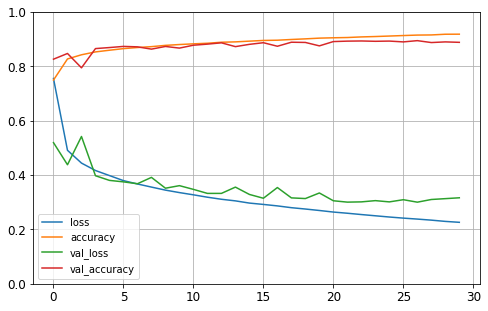

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Task 4
 Validate your model using `model.evaluate` on the test set made of `X_test` <br> and `y_test`. 

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [ ]:
# evaluate model on  test set
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3468 - accuracy: 0.8802


[0.3468365967273712, 0.8802000284194946]

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

### Task 5
 Select the first three samples from the test set and predict their <br> corresponding classes using model.predict_classes . Then print the names/ <br>
 categories of the elements in  question (Eg. "Pants", "trouser") 

Hint: With `model.predict(...)` you can get the predictions in a [one-hot-encoded](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/) <br> 
format. Use `np.argmax(prediction, axis=-1)` on the one-hot-encoded predicitons <br>
to get the classes numbers.

In [ ]:
X_new = X_test[:3]

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [ ]:
y_pred = np.argmax(model.predict(X_new), axis=-1)

1/1 [==============================] - 0s 104ms/step


↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

In [ ]:
y_test[0:3]

array([9, 2, 1], dtype=uint8)

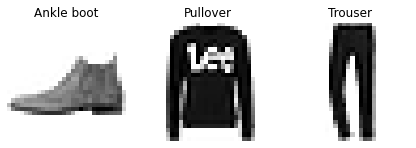

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Regression MLP

We can also build multi-layer perceptrons for regression. The difference here <br>
is that we remove the step function that says 

Let's load, split and scale the [California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html).

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)


### Task 6
 Scale your training, validation, and test feature matrices using scikit-learn's <br>
[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Best practice is to fit your scaler to a single sample and <br>
scale all samples by the same amount. This standard scaler is implementing <br>
standardization also sometimes referred to as standard normalization.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

### Task 7
 Build a Neural Network with one hidden layer with 30 neurons. The output layer <br> 
has one neuron, which is the regression value. Compile, fit then train this <br> 
network on the data created in task 6 while choosing the suitable loss function <br> 
and the SGD optimizer. 

**N.B:**  This task is similar to task 5 except that we now do regression not <br> classification. 

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1, activation="linear")
])

model.compile(loss="mse",
              optimizer="sgd",
              metrics=["mae"])
...
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
363/363 [==============================] - 3s 5ms/step - loss: 0.8464 - mae: 0.6434 - val_loss: 10.7265 - val_mae: 0.5837
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6123 - mae: 0.5264 - val_loss: 6.4196 - val_mae: 0.5335
Epoch 3/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5123 - mae: 0.4919 - val_loss: 3.5801 - val_mae: 0.4957
Epoch 4/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4410 - mae: 0.4671 - val_loss: 0.3792 - val_mae: 0.4386
Epoch 5/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4093 - mae: 0.4572 - val_loss: 0.3713 - val_mae: 0.4400
Epoch 6/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4023 - mae: 0.4527 - val_loss: 0.3972 - val_mae: 0.4365
Epoch 7/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4133 - mae: 0.4541 - val_loss: 0.3670 - val_mae: 0.4308
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

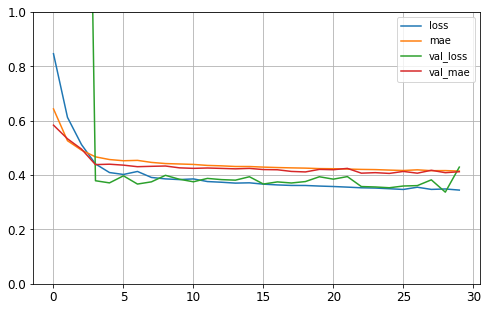

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Task 8
Validate your model using `model.evaluate` on the test set. <br>
Also predict one element of the test set of your choice (`X_test[42]` for  <br>
example) and compare to the real value.

Note that to have consistent dimensionality, you'll have to pass `X_test[42:43]` <br>
rather than `X_test[42]` into your model prediction. Passing only `X_test[42]` <br> in will result in an error.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [ ]:
mse_test = model.evaluate(X_test, y_test)
model.predict(X_test[42:43])

1/1 [==============================] - 0s 52ms/step


array([[1.0321549]], dtype=float32)

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

# Saving the model weights for future use

In [ ]:
model.save("my_keras_model")

In [ ]:
model_reloaded = keras.models.load_model("my_keras_model")

In [ ]:
model_reloaded.predict(X_test[42:43])

1/1 [==============================] - 0s 42ms/step


array([[1.0321549]], dtype=float32)

In [ ]:
model.save_weights("my_keras_weights.h5")

In [ ]:
model.load_weights("my_keras_weights.h5")

## Looking at the saved weights

In [ ]:
import h5py

In [ ]:
f = h5py.File("my_keras_weights.h5")

In [ ]:
list(f.keys())

['dense_3', 'dense_4', 'top_level_model_weights']

In [ ]:
for name in f["dense_3/dense_3"]:
    print(name)

bias:0
kernel:0


In [ ]:
f["dense_3"]["dense_3"].keys()

<KeysViewHDF5 ['bias:0', 'kernel:0']>

In [ ]:
np.array(f["dense_3"]["dense_3"]["bias:0"])

array([ 0.10842498,  0.11613527,  0.15705633, -0.01741704, -0.03658498,
       -0.19855046, -0.16747142,  0.14481309, -0.2082063 , -0.6827693 ,
        0.0992313 , -0.09839074, -0.11114213, -0.22077417,  0.0722176 ,
       -0.09918797, -0.09604663,  0.48462114,  0.17509425, -0.02297088,
       -0.2241173 , -0.02395646, -0.27315268,  0.03046741,  0.05609842,
       -0.23969969,  0.2701829 ,  0.1610957 ,  0.10681918, -0.18132892],
      dtype=float32)

In [ ]:
np.array(f["dense_3"]["dense_3"]["kernel:0"])

array([[ 3.48905958e-02, -6.09516092e-02,  5.15623391e-01,
        -5.81604838e-02,  2.47367263e-01,  3.17283094e-01,
        -7.82418549e-02, -2.62993306e-01,  3.26071233e-01,
         4.68839884e-01, -2.80683249e-01, -1.25378475e-01,
         7.18900561e-02, -3.12383920e-01,  1.58034414e-01,
        -2.99822450e-01, -1.04319975e-01,  4.43848521e-01,
        -1.36520967e-01, -3.18232119e-01, -1.61140636e-01,
        -2.96678394e-01,  4.15112972e-01, -5.07837117e-01,
        -1.88677520e-01, -2.49563470e-01, -3.16668540e-01,
        -8.98888633e-02, -2.55701810e-01,  2.30012298e-01],
       [-2.59060085e-01,  5.30916415e-02,  1.60708070e-01,
         2.24401698e-01,  3.77214372e-01,  2.21116573e-01,
         2.49889061e-01,  2.07209904e-02,  1.49367586e-01,
         1.69823140e-01,  2.74718434e-01,  9.90419090e-02,
         2.19700024e-01, -6.20442219e-02,  2.64402300e-01,
         8.32373858e-04,  2.91814178e-01,  6.41345084e-02,
         2.85836339e-01,  1.82368696e-01,  1.58329606e-

In [ ]:
f["dense_3"]["dense_3"]["kernel:0"].shape

(8, 30)

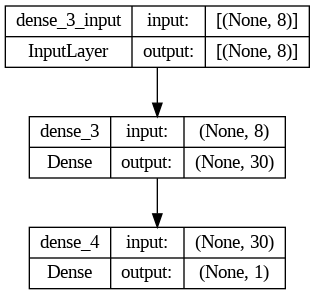

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

One layer is actually nothing but performing a matrix multiplication, adding <br> 
the bias and putting it through the activation function. <br>
You can see this by looking at the shape of `dense_3`.

### Task 9
 For `X_train[0]` perform the forward pass yourself using matrix <br> multiplications.
Remember to include the biases. <br>
Check with the prediction of the model that you get exactly the same! <br>

Hints:
- use `np.dot(x,y)` for matrix multiplication
- for the first layer it would look like this:
    * matrix mult: `X_new` dot `l1`
    * add bias `b1`
    * apply `relu(...)`

In [ ]:
b1 = np.array(f["dense_3"]["dense_3"]["bias:0"])
l1 = np.array(f["dense_3"]["dense_3"]["kernel:0"])
b2 = np.array(f["dense_4"]["dense_4"]["bias:0"])
l2 = np.array(f["dense_4"]["dense_4"]["kernel:0"])

In [ ]:
X_new = X_train[0]

In [ ]:
X_new.shape

(8,)

In [ ]:
l1.shape

(8, 30)

In [ ]:
b1.shape

(30,)

In [ ]:
def relu(z):
    return np.maximum(0, z)

In [ ]:
model.predict(X_train[0:1])   # reproduce this!

1/1 [==============================] - 0s 20ms/step


array([[2.899994]], dtype=float32)

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [ ]:
layer_1 = relu(np.dot(X_new, l1) + b1)
prediction = relu(np.dot(layer_1, l2) + b2)
prediction

array([2.89999376])

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

# Optional task

**Exercise (bonus task, +3 points):**   
Train a deep MLP on the MNIST dataset (you can load it using <br>
`keras.datasets.mnist.load_data()`. See if you can get over 98% precision.

You can try searching for the optimal learning rate by using the approach <br>
presented in this chapter (i.e., by growing the learning rate exponentially, <br> 
plotting the loss, and finding the point where the loss shoots up). Try adding <br> 
all the bells and whistles—save checkpoints, use early stopping, and plot <br> learning curves using TensorBoard. <br>
Feel free to use other methods.

Let's load the dataset:

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Just like for the Fashion MNIST dataset, the MNIST training set contains 60,000 <br>
 grayscale images, each 28x28 pixels:

In [ ]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is also represented as a byte (0 to 255):

In [ ]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) <br>
training set. We also scale the pixel intensities down to the 0-1 range and <br> 
convert them to floats, by dividing by 255, just like we did for Fashion MNIST:

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [ ]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohc_encoder = OneHotEncoder()
ohc_encoder.fit(y_train.reshape(-1,1))
y_train_ohc = ohc_encoder.transform(y_train.reshape(-1,1))
y_valid_ohc = ohc_encoder.transform(y_valid.reshape(-1,1))
y_test_ohc = ohc_encoder.transform(y_test.reshape(-1,1))

In [ ]:
y_train_ohc.todense()

matrix([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])


In [ ]:
from keras.callbacks import ReduceLROnPlateau
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard("my_mnist_model.log")
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.00001)

history = model.fit(
    X_train, y_train_ohc.todense(), epochs=30,
    validation_data=(X_valid, y_valid_ohc.todense()),
    callbacks=[
        reduce_lr,
        checkpoint_cb,
        early_stopping_cb,
        tensorboard_cb,
        ]
    )

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2308 - accuracy: 0.9288 - val_loss: 0.1007 - val_accuracy: 0.9680 - lr: 0.3000
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0962 - accuracy: 0.9698 - val_loss: 0.0938 - val_accuracy: 0.9714 - lr: 0.3000
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0669 - accuracy: 0.9786 - val_loss: 0.0683 - val_accuracy: 0.9790 - lr: 0.3000
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0485 - accuracy: 0.9844 - val_loss: 0.0716 - val_accuracy: 0.9796 - lr: 0.3000
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0359 - accuracy: 0.9883 - val_loss: 0.1120 - val_accuracy: 0.9700 - lr: 0.3000
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0276 - accuracy: 0.9912 - val_loss: 0.1014 - val_accuracy: 0.9720 - lr: 0.3000
Epoch 7/30
1719/1719 [==============================] - 6

In [ ]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test_ohc.todense())

313/313 [==============================] - 1s 3ms/step - loss: 0.0665 - accuracy: 0.9835


[0.06653944402933121, 0.9835000038146973]

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above